In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
%matplotlib inline

In [6]:
glob.glob("./*csv")

['.\\carilBad1.csv',
 '.\\carilBad2.csv',
 '.\\carilBad3.csv',
 '.\\carilBad4.csv',
 '.\\carilBad5.csv',
 '.\\carilGood1.csv',
 '.\\carilGood2.csv',
 '.\\complete.csv',
 '.\\ferGood1.csv',
 '.\\ferGood2.csv',
 '.\\ferGood3.csv',
 '.\\fernandoBad1.csv',
 '.\\fernandoBad2.csv',
 '.\\fernandoBad3.csv',
 '.\\fernandoBad4.csv',
 '.\\fernandoBad5.csv',
 '.\\gabrielBad1.csv',
 '.\\gabrielBad2.csv',
 '.\\gabrielBad3.csv',
 '.\\gabrielBad4.csv',
 '.\\gabrielGood1.csv',
 '.\\gabrielGood2.csv',
 '.\\test.csv',
 '.\\train.csv',
 '.\\Xtest.csv',
 '.\\Xtrain.csv']

In [7]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train_p = pd.read_csv("Xtrain.csv")
test_p = pd.read_csv("Xtest.csv")

In [8]:
train.columns

Index(['Frame', 'Nose_x', 'Nose_y', 'Neck_x', 'Neck_y', 'RShoulder_x',
       'RShoulder_y', 'RElbow_x', 'RElbow_y', 'RWrist_x', 'RWrist_y',
       'LShoulder_x', 'LShoulder_y', 'LElbow_x', 'LElbow_y', 'LWrist_x',
       'LWrist_y', 'MidHip_x', 'MidHip_y', 'RHip_x', 'RHip_y', 'RKnee_x',
       'RKnee_y', 'RAnkle_x', 'RAnkle_y', 'LHip_x', 'LHip_y', 'LKnee_x',
       'LKnee_y', 'LAnkle_x', 'LAnkle_y', 'REye_x', 'REye_y', 'LEye_x',
       'LEye_y', 'REar_x', 'REar_y', 'LEar_x', 'LEar_y', 'LBigToe_x',
       'LBigToe_y', 'LSmallToe_x', 'LSmallToe_y', 'LHeel_x', 'LHeel_y',
       'RBigToe_x', 'RBigToe_y', 'RSmallToe_x', 'RSmallToe_y', 'RHeel_x',
       'RHeel_y', 'ds', 'postura_b', 'tipo_postura', 'postura'],
      dtype='object')

In [9]:
train_p.columns

Index(['Nose_x', 'Nose_y', 'Neck_x', 'Neck_y', 'RShoulder_x', 'RShoulder_y',
       'RElbow_x', 'RElbow_y', 'RWrist_x', 'RWrist_y', 'LShoulder_x',
       'LShoulder_y', 'LElbow_x', 'LElbow_y', 'LWrist_x', 'LWrist_y',
       'MidHip_x', 'MidHip_y', 'RHip_x', 'RHip_y', 'RKnee_x', 'RKnee_y',
       'RAnkle_x', 'RAnkle_y', 'LHip_x', 'LHip_y', 'LKnee_x', 'LKnee_y',
       'LAnkle_x', 'LAnkle_y', 'REye_x', 'REye_y', 'LEye_x', 'LEye_y',
       'REar_x', 'REar_y', 'LEar_x', 'LEar_y', 'LBigToe_x', 'LBigToe_y',
       'LSmallToe_x', 'LSmallToe_y', 'LHeel_x', 'LHeel_y', 'RBigToe_x',
       'RBigToe_y', 'RSmallToe_x', 'RSmallToe_y', 'RHeel_x', 'RHeel_y',
       'pred_b', 'pred'],
      dtype='object')

In [10]:
len(train), len(train_p)

(33520, 33520)

In [11]:
from sklearn.metrics import confusion_matrix

In [29]:
preds_b = (train_p.pred_b > 0.5).astype(int)
preds = (train_p.pred)

In [21]:
cm=confusion_matrix(train.postura_b,preds_b)

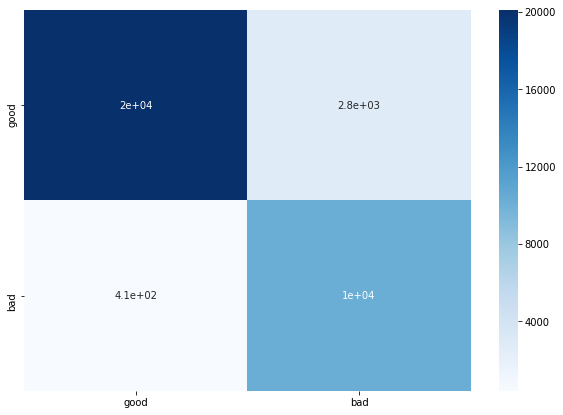

In [63]:
df_cm = pd.DataFrame(cm, index = ["good", "bad"],
                  columns = ["good", "bad"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="Blues")

In [58]:
(train.postura == 1).sum()
(preds == 0).sum()

3898

In [30]:
cm_t=confusion_matrix(train.postura,preds)

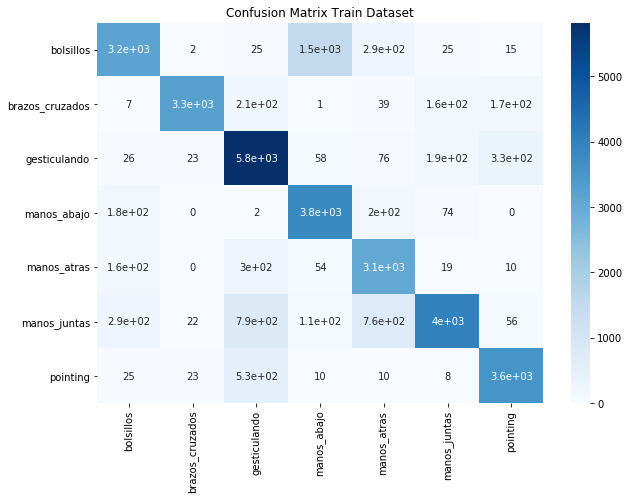

In [81]:
df_cm = pd.DataFrame(cm_t, index = labels.index.values, columns=labels.index.values)#, index = range(cm_t.shape[0]),columns = range(cm_t.shape[1]))
plt.figure(figsize = (10,7))
ax = sns.heatmap(df_cm, annot=True, cmap="Blues")
ax.set_title("Confusion Matrix Train Dataset")
plt.savefig('CM_train_postures.png', bbox_inches='tight')

In [45]:
p_names = train.tipo_postura.value_counts()

In [43]:
posturas = train.postura.value_counts()

In [53]:
for i in range(len(p_names)):
    p_names[i] = posturas.index[i]

In [68]:
labels = p_names.sort_values()

In [71]:
labels.index.values

array(['bolsillos', 'brazos_cruzados', 'gesticulando', 'manos_abajo',
       'manos_atras', 'manos_juntas', 'pointing'], dtype=object)